<font size=6><b>Lec04. MNIST DL

In [26]:
import tensorflow
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.set_option('max_colwidth', None)



In [9]:
np.random.seed(1234)
tf.random.set_seed(1234)

# Data Load

In [38]:
(X_train, y_train), (X_test, y_test) = tensorflow.keras.datasets.mnist.load_data()

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# EDA

## 이미지셋

In [40]:
print(y_train[0],X_train[0])

5 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 

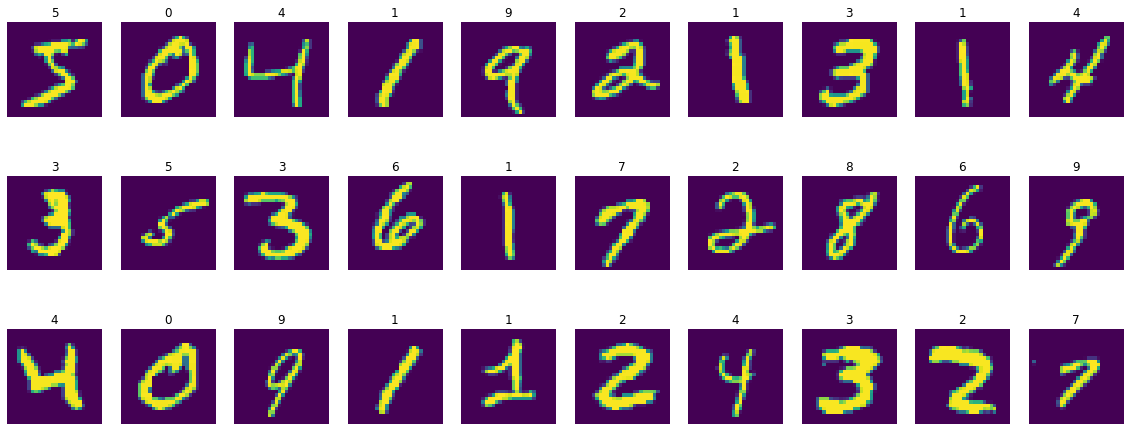

In [51]:
px, ax = plt.subplots(3, 10, figsize=(20,8))
plt.axis('off')
for i, x in enumerate(range(30)) :
    r = i//10
    c = i%10
    ax[r][c].imshow(X_train[x])
    ax[r][c].set_title(y_train[i])
    ax[r][c].axis('Off')
plt.show()    

## 타겟 분포도

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64


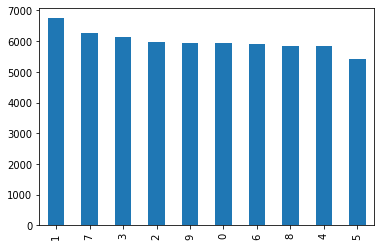

In [54]:
print( pd.Series(y_train).value_counts() )
pd.Series(y_train).value_counts().plot.bar()
plt.show()

In [60]:
idx_list = []
s = pd.Series(y_train)
for i in range(10):
    idx_list.extend(s[s.values == i].index[:10])
print( len(idx_list) , idx_list )

100 [1, 21, 34, 37, 51, 56, 63, 68, 69, 75, 3, 6, 8, 14, 23, 24, 40, 59, 67, 70, 5, 16, 25, 28, 76, 82, 109, 117, 120, 122, 7, 10, 12, 27, 30, 44, 49, 50, 74, 86, 2, 9, 20, 26, 53, 58, 60, 61, 64, 89, 0, 11, 35, 47, 65, 100, 132, 138, 145, 173, 13, 18, 32, 36, 39, 62, 66, 73, 83, 90, 15, 29, 38, 42, 52, 71, 79, 84, 91, 96, 17, 31, 41, 46, 55, 85, 94, 97, 125, 137, 4, 19, 22, 33, 43, 45, 48, 54, 57, 80]


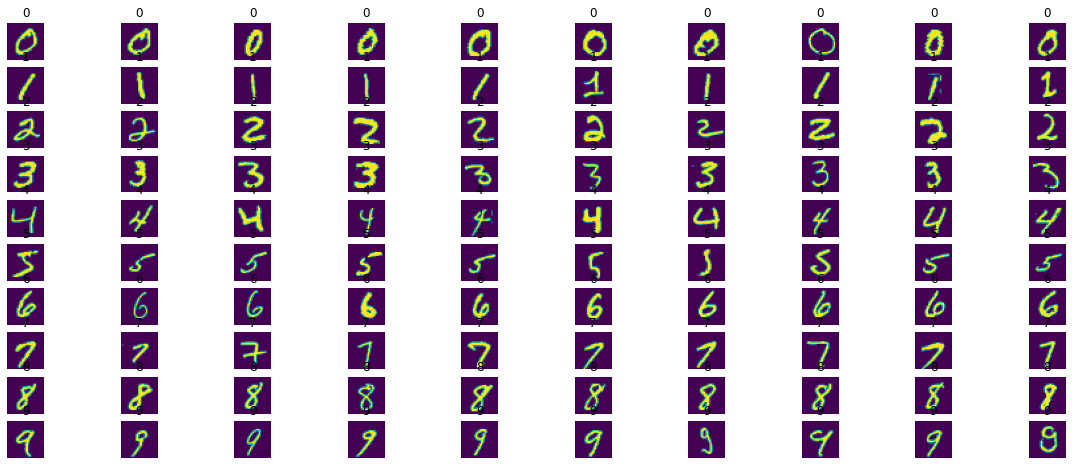

In [63]:
px, ax = plt.subplots(10, 10, figsize=(20,8))
plt.axis('off')
for i, idx in enumerate(idx_list) :
    r = i//10
    c = i%10
    ax[r][c].imshow(X_train[idx])
    ax[r][c].set_title(y_train[idx])
    ax[r][c].axis('Off')
plt.show()    

# 전처리 & 가공
* 픽셀 (정규화)표준화  
* -------------------  StandardScaler (평균0 편차1 범위로 데이터 축소)
* -------------------  <b>MinMaxScaler (최소0 최대1 범위로 데이터 축소)</b>
* 이미지 크기 맞추기 ----------- NPL.padding
* 부족한 데이터 증강 ----------- SMOTE

## X  : 픽셀 (정규화)표준화

In [86]:
X_train_scaler = X_train / 255.0
X_test_scaler = X_test / 255.0

In [79]:
# X_trian_scaler[:1]

## y : 원핫인코딩

In [87]:
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train,  num_classes=10, dtype='int32')
y_test_oh  = to_categorical(y_test,  num_classes=10, dtype='int32')

In [88]:
y_train[:5], y_train_oh[:5]

(array([5, 0, 4, 1, 9], dtype=uint8),
 array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]))

In [89]:
len(X_train[0])

28

# 모델 & 학습

## X: flatten()

In [106]:
X_train.shape, X_test.shape

((60000, 784), (10000, 28, 28))

In [107]:
X_trian_scaler = X_trian_scaler.reshape(X_train.shape[0], -1)  #  (60000, 784)
X_test_scaler = X_test_scaler.reshape(X_test.shape[0], -1)     #  (10000, 784)

In [108]:
X_trian_scaler.shape, X_test_scaler.shape

((60000, 784), (10000, 784))

## 모델 생성

In [109]:
model_c = Sequential()
model_c.add(Dense(units=10,  activation='relu',  input_dim=784))  
# model_c.add(Dense(units=10,  activation='relu',  input_dim=28*28))  
# model_c.add(Dense(units=64,  activation='relu',  input_shape=(28*28, ) ))  
model_c.add(Dense(units=64,  activation='relu')) 
model_c.add(Dense(units=32,  activation='relu')) 
model_c.add(Dense(units=16,  activation='relu')) 
model_c.add(Dense(units=10 , activation='softmax'))      #--------------- 멀티분류

model_c.compile(optimizer='adam',              
            loss='categorical_crossentropy',             #------원핫인코딩
            metrics=['accuracy'])              
print(model_c.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 64)                704       
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 10)                170       
                                                                 
Total params: 11,332
Trainable params: 11,332
Non-trainable params: 0
_________________________________________________________________
None


## 학습 
* (오 ~~~ 랜  시간이 걸림...주의주의주의)
* optimizer가 weight  최적화 .. 

In [ ]:
# fit_res = model_c.fit(X_trian_scaler, y_train_oh   #------X:sacling  y:onhot-encodin
#                   , batch_size=10
#                   , epochs=2
#                   , validation_data=(X_test_scaler, y_test_oh)
#                  )


# 모델 저장

## Sequential 클래스의  save_weights(), save()

### save_weights() vs save_model()
* save_weights() : only weights
* save_model() : weights + model 구조

In [119]:
# from tensorflow.keras.applications import InceptionV3
# goomodel = InceptionV3()
# goomodel.summary()

### 모델 저장

In [113]:
# model_c.save("./mymodel_v01")

INFO:tensorflow:Assets written to: ./mymodel_v01\assets


### weight 저장

In [116]:
# model_c.save_weights("./mymodel_weight.h5")

### weight 불러오기

In [125]:
re_model = Sequential()
re_model.add(Dense(units=10,  activation='relu',  input_dim=784))  
re_model.add(Dense(units=64,  activation='relu')) 
re_model.add(Dense(units=32,  activation='relu')) 
re_model.add(Dense(units=16,  activation='relu')) 
re_model.add(Dense(units=10 , activation='softmax'))      #--------------- 멀티분류

re_model.load_weights("./mymodel_weight.h5")

re_model.compile(optimizer='adam',              
            loss='categorical_crossentropy',             #------원핫인코딩
            metrics=['accuracy'])   

print(re_model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 10)                7850      
                                                                 
 dense_57 (Dense)            (None, 64)                704       
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 16)                528       
                                                                 
 dense_60 (Dense)            (None, 10)                170       
                                                                 
Total params: 11,332
Trainable params: 11,332
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
re_model.get_weights()

[array([[-0.0772269 , -0.06495235, -0.07992047, ..., -0.00842121,
         -0.0547464 , -0.08493704],
        [-0.00601405, -0.0593049 ,  0.06255155, ...,  0.05210143,
         -0.0001052 , -0.08130106],
        [ 0.00657073,  0.08222195,  0.06730259, ...,  0.02356357,
          0.07517061, -0.05232506],
        ...,
        [ 0.01430409,  0.02155139, -0.0821729 , ..., -0.03532356,
         -0.04211134,  0.07719152],
        [-0.03343132,  0.05815635, -0.01497239, ..., -0.03554806,
          0.06511631,  0.04342843],
        [-0.05393164,  0.0040172 ,  0.07347559, ...,  0.06077132,
          0.08040949,  0.02370971]], dtype=float32),
 array([ 0.85222673,  0.19433905, -0.24336648,  0.79488724,  0.8669877 ,
         0.4963668 ,  1.1806941 ,  0.8426145 ,  0.27442557, -0.09052107],
       dtype=float32),
 array([[-2.65895218e-01, -9.38710988e-01, -7.45975256e-01,
         -5.51409185e-01, -1.30689228e+00,  5.16375840e-01,
         -2.99164563e-01, -7.00635314e-01, -5.46071053e-01,
        

### weight 적용 후 평가

* 원본

In [123]:
loss, acc = model_c.evaluate(X_test_scaler, y_test_oh)
print(f"loss: {loss}  accuracy : {acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.9479
loss: 0.2910466194152832  accuracy : 0.9478999972343445


* weight를 적용한 신규모델

In [126]:
loss, acc = re_model.evaluate(X_test_scaler, y_test_oh)
print(f"loss: {loss}  accuracy : {acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.2910 - accuracy: 0.9479
loss: 0.2910466194152832  accuracy : 0.9478999972343445


## keras.models 모듈의 save_model(), load_model() 
<pre><font color=red><b>
  저장     : save_model(model_c, "mymodel.h5")
  불러오기 : a = load_model("mymodel.h5")

### 모델저장

In [112]:
from tensorflow.keras.models import save_model, load_model

In [115]:
# save_model(model_c, "./mymodel.h5")

### 저장된 모델 불러오기

In [127]:
re_model2 = load_model("./mymodel.h5")
re_model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 64)                704       
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 10)                170       
                                                                 
Total params: 11,332
Trainable params: 11,332
Non-trainable params: 0
_________________________________________________________________


### 불러온 모델 평가

In [128]:
loss, acc = re_model2.evaluate(X_test_scaler, y_test_oh)
print(f"loss: {loss}  accuracy : {acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.9479
loss: 0.2910466194152832  accuracy : 0.9478999972343445


# 평가 검증

## 오답 문제 확인

In [135]:
model_c = load_model("./mymodel.h5")

In [141]:
proba = model_c.predict(X_test_scaler)
print(proba[0])

313/313 [==============================] - 0s 1ms/step
[1.3732889e-35 5.8472657e-11 3.4151865e-10 1.9714097e-08 1.1089861e-09
 3.0934374e-17 3.9118974e-35 1.0000000e+00 3.5204789e-10 3.7327247e-08]


In [143]:
np.argmax(proba[0])  #1.0000000e+00

7

In [173]:
yhat_list = []
for v in proba:
    yhat_list.append(np.argmax(v))  #1.0000000e+00

check_df = pd.DataFrame({"y":y_test,  "yhat" : yhat_list})
print(check_df.shape)
check_df.head()

(10000, 2)


,y,yhat
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [ ]:
idx_list = check_df[check_df['y'] != check_df['yhat']].index
len(idx_list), idx_list[:5]

(521, Int64Index([20, 66, 92, 115, 124], dtype='int64'))

In [176]:
check_df[check_df['y'] != check_df['yhat']].value_counts()[:5]

y  yhat
9  4       33
   7       26
5  3       26
4  9       17
3  8       15
1  8       15
3  2       15
2  7       14
6  0       14
2  3       12
dtype: int64

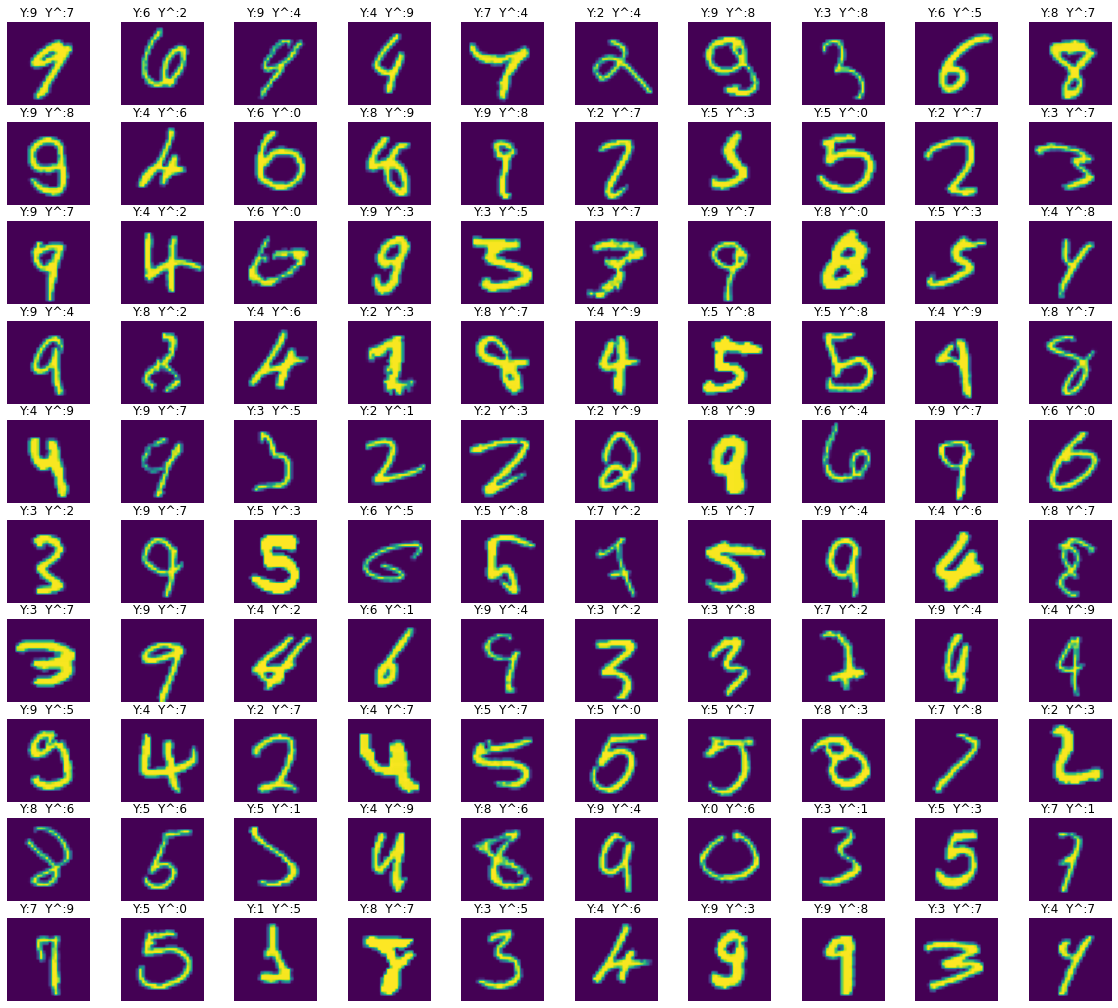

In [183]:
px, ax = plt.subplots(10, 10, figsize=(20,18))
plt.axis('off')
for i, idx in enumerate(idx_list[:100]) :
    r = i//10
    c = i%10
    ax[r][c].imshow(  X_test[idx].reshape(28,28)  )
    ax[r][c].set_title(f"Y:{y_test[idx]}  Y^:{check_df.loc[idx]['yhat']} ")
    ax[r][c].axis('Off')
plt.show()    

In [184]:
# check_df = check_df[check_df['y'] != check_df['yhat']].sort_values("y")
# px, ax = plt.subplots(10, 10, figsize=(20,18))
# plt.axis('off')
# for i, idx in enumerate(check_df[:100].index):
#     r = i//10
#     c = i%10
#     ax[r][c].imshow(  X_test[idx].reshape(28,28)  )
#     ax[r][c].set_title(f"Y:{y_test[idx]}  Y^:{check_df.loc[idx]['yhat']} ")
#     ax[r][c].axis('Off')
# plt.show()    

## 평가 차트

In [136]:
loss, acc = model_c.evaluate(X_test_scaler, y_test_oh)
print(f"loss: {loss}  accuracy : {acc}")

313/313 [==============================] - 1s 1ms/step - loss: 0.2910 - accuracy: 0.9479
loss: 0.2910466194152832  accuracy : 0.9478999972343445


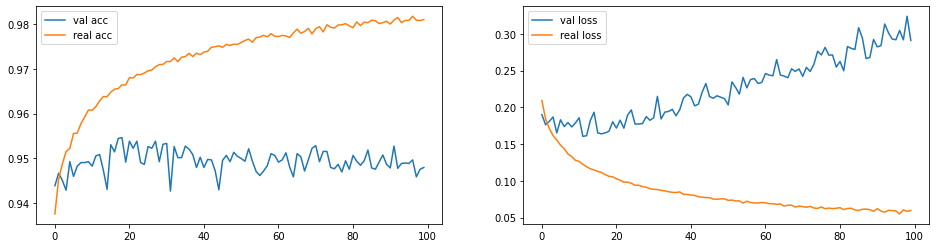

In [137]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
vloss = fit_res.history["val_accuracy"]
loss = fit_res.history["accuracy"]
plt.plot(range(100),vloss , label="val acc")
plt.plot(range(100),loss  , label="real acc")
plt.legend()

plt.subplot(1,2,2)
vloss = fit_res.history["val_loss"]
loss = fit_res.history["loss"]
plt.plot(range(100),vloss , label="val loss")
plt.plot(range(100),loss  , label="real loss")
plt.legend()
plt.show()

In [ ]:
# early_stopping = EarlyStopping(patience =3)

# model_checkpoint = ModelCheckpoint(
#  monitor=’accuracy’, 
# , save_best_only=True,
# filepath="./mycheck/{epoch}_{val_loss}.h5")


# model.fit(X_train, Y_train, nb_epoch= 1000
#            , callbacks=[early_stopping, model_checkpoint ])
